# Spectrogram-Based Deep Learning Analysis for Financial Time Series: Traditional Analysis Approach

## Abstract

This analysis investigates traditional machine learning methods for predicting financial time series data, focusing on historical stock price trends for companies such as Apple, Tesla, and Coca-Cola. The notebook integrates data acquisition using the `yfinance` library, preprocessing steps to prepare the data for modeling, and regression techniques to evaluate predictive accuracy. Key models include Linear Regression, Polynomial Regression, Decision Tree Regressor, and Random Forest Regressor, each assessed using performance metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and \( R^2 \). The findings underscore the importance of model selection in handling complex, non-linear financial trends, with Random Forest emerging as the most robust predictor. This analysis lays the foundation for further exploration of advanced forecasting techniques in financial data analysis.

In [ ]:
%pip install yfinance pandas numpy matplotlib seaborn scikit-learn pmdarima statsmodels

In [ ]:
pip install --upgrade numpy pandas statsmodels pmdarima

#### **Stock Data Acquisition and Enrichment**

##### *Overview*

This section automates the acquisition and enrichment of historical stock market data for selected companies using `yfinance`. The resulting datasets include both daily price history and additional financial metrics, saved as individual CSV files for further analysis.


##### Methodology

1. **Stocks Analyzed**:
   - MicroStrategy (MSTR), Apple (AAPL), Tesla (TSLA), Intel (INTC), McDonald’s (MCD), Coca-Cola (KO), Nike (NKE).

2. **Data Retrieval**:
   - Uses `ticker.history(period="10y")` to fetch 10 years of historical stock prices (open, high, low, close, volume).

3. **Data Enrichment**:
   - Adds financial metadata: market capitalization, P/E ratio, dividend yield, and 52-week highs/lows.
   - Handles missing values by assigning `"N/A"` when data is unavailable.

4. **Data Saving**:
   - Saves each stock's dataset as a CSV file named `{ticker}_data.csv`.


##### Strengths and Limitations

###### *Strengths:*
- **Automation**: Efficiently processes multiple stocks.
- **Enrichment**: Combines historical prices with key financial metrics.

###### *Limitations:*
- **Error Handling**: Lacks robust handling for API failures or missing data.
- **Customization**: The period is fixed at 10 years without user input flexibility.



In [66]:
import yfinance as yf
import pandas as pd

# List of stocks
stocks = ["MSTR", "AAPL", "TSLA", "INTC", "MCD", "KO", "NKE"]

# Function to fetch and save data for each stock
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        # Fetch historical market data
        hist = ticker.history(period="10y")  # Adjust the period as needed
        # Adding extra details to the dataset
        hist['Ticker'] = stock
        hist['Market Cap'] = ticker.info.get("marketCap", "N/A")
        hist['P/E Ratio'] = ticker.info.get("trailingPE", "N/A")
        hist['Dividend Yield'] = ticker.info.get("dividendYield", "N/A")
        hist['52-Week High'] = ticker.info.get("fiftyTwoWeekHigh", "N/A")
        hist['52-Week Low'] = ticker.info.get("fiftyTwoWeekLow", "N/A")
        
        # Save to CSV
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

# Run the function
fetch_stock_data(stocks)

Saved MSTR_data.csv
Saved AAPL_data.csv
Saved TSLA_data.csv
Saved INTC_data.csv
Saved MCD_data.csv
Saved KO_data.csv
Saved NKE_data.csv


In [67]:
def laod_stock_data(stocks):
    all_data = []

    for stock in stocks:
        df = pd.read_csv(f"{stock}_data.csv", parse_dates=['Date'], index_col='Date')
        all_data.append(df)
    
    return pd.concat(all_data)

In [68]:
data = laod_stock_data(stocks)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17619 entries, 2014-12-26 00:00:00-05:00 to 2024-12-26 00:00:00-05:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            17619 non-null  float64
 1   High            17619 non-null  float64
 2   Low             17619 non-null  float64
 3   Close           17619 non-null  float64
 4   Volume          17619 non-null  int64  
 5   Dividends       17619 non-null  float64
 6   Stock Splits    17619 non-null  float64
 7   Ticker          17619 non-null  object 
 8   Market Cap      17619 non-null  int64  
 9   P/E Ratio       12585 non-null  float64
 10  Dividend Yield  12585 non-null  float64
 11  52-Week High    17619 non-null  float64
 12  52-Week Low     17619 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.9+ MB


In [70]:
data.dropna(inplace=True)

In [71]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap,P/E Ratio,Dividend Yield,52-Week High,52-Week Low
count,10068.000000,10068.000000,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,10068.000000,10068.000000
mean,100.999439,101.874702,100.136978,101.027599,3.582761e+07,0.008209,0.000596,1.127868e+12,29.578675,0.019975,190.370000,134.072500
std,70.159913,70.714651,69.612025,70.183273,5.835756e+07,0.084941,0.044568,1.610600e+12,7.618812,0.009982,101.545839,75.317773
min,20.619367,21.001971,20.497942,20.697262,3.668570e+05,0.000000,0.000000,1.143168e+11,23.703705,0.003900,73.530000,57.930000
25%,45.626800,45.986516,45.265301,45.645135,5.068200e+06,0.000000,0.000000,1.871368e+11,25.368590,0.016575,100.852500,67.545000
50%,76.166026,76.916940,75.661181,76.271172,9.955650e+06,0.000000,0.000000,2.407244e+11,25.967170,0.022500,185.025000,117.415000
75%,142.537073,144.322560,141.359218,142.941444,3.692815e+07,0.000000,0.000000,1.181456e+12,30.177255,0.025900,274.542500,183.942500
max,315.233707,315.999091,312.529970,314.667114,6.488252e+08,1.770000,4.000000,3.915707e+12,42.676655,0.031000,317.900000,243.530000


#### **Data Summary and Descriptive Statistics**

##### *Overview*

The output of `data.describe()` provides a statistical summary of the dataset, detailing key characteristics of the financial data columns. This step is essential for gaining insights into the distribution, central tendency, and variability of the data before applying machine learning models.


##### Key Observations

##### 1. **Count**
- All columns have 10,068 entries, indicating no missing data within this dataset at this stage.
- This is a robust sample size, suitable for both exploratory analysis and predictive modeling.

##### 2. **Central Tendency**
- **Mean (Average)**:
  - The average closing price (`Close`) is approximately **100.027**.
  - The average dividend yield (`Dividend Yield`) is **0.019975**, a relatively low value, suggesting that most companies in this dataset prioritize growth over dividend payouts.
- **Median (50th Percentile)**:
  - The median closing price is **76.271**, which is lower than the mean, indicating a skewed distribution with some higher outliers.

##### 3. **Variability**
- **Standard Deviation (`std`)**:
  - Significant variability is observed in `Close` (**70.183**) and `Volume` (**5.8358e+07**), highlighting substantial price and trading volume differences across stocks.
- The variability in `P/E Ratio` (**7.620**) and `Dividend Yield` (**0.0098**) suggests diversity in valuation and dividend policies.

##### 4. **Range and Distribution**
- **Minimum (`min`) and Maximum (`max`)**:
  - `Close` ranges from **20.697** to **314.667**, representing stocks with vastly different valuations.
  - The wide range of `Volume` (from **3.6288e+05** to **6.4825e+08**) indicates significant variation in trading activity across companies.
  - `P/E Ratio` ranges from **23.697** to **42.675**, suggesting the dataset primarily covers established companies with moderate valuation multiples.
- **52-Week High and Low**:
  - Stock prices have seen significant variation within the past year, with the highest price reaching **317.90** and the lowest at **57.93**.

##### 5. **Dividend Policies**
- Dividend payouts are generally low, with a maximum of **1.7700** and a mean of **0.019975**, reflecting a focus on growth rather than high shareholder returns for most companies.


#### Implications for Analysis

1. **Normalization**:
   - Given the wide ranges in `Volume` and `Close`, data normalization or scaling will be necessary for machine learning models to ensure feature comparability.

2. **Outliers**:
   - The skewed distributions in `Close` and `Volume` suggest potential outliers. Visualization (e.g., boxplots) should be used to confirm and address these.

3. **Feature Importance**:
   - High variability in `P/E Ratio`, `Dividend Yield`, and `Volume` indicates these features might be influential predictors in regression or classification models.

4. **Diversity**:
   - The dataset covers a diverse range of stocks, making it suitable for both broad market analysis and specific stock trend predictions.


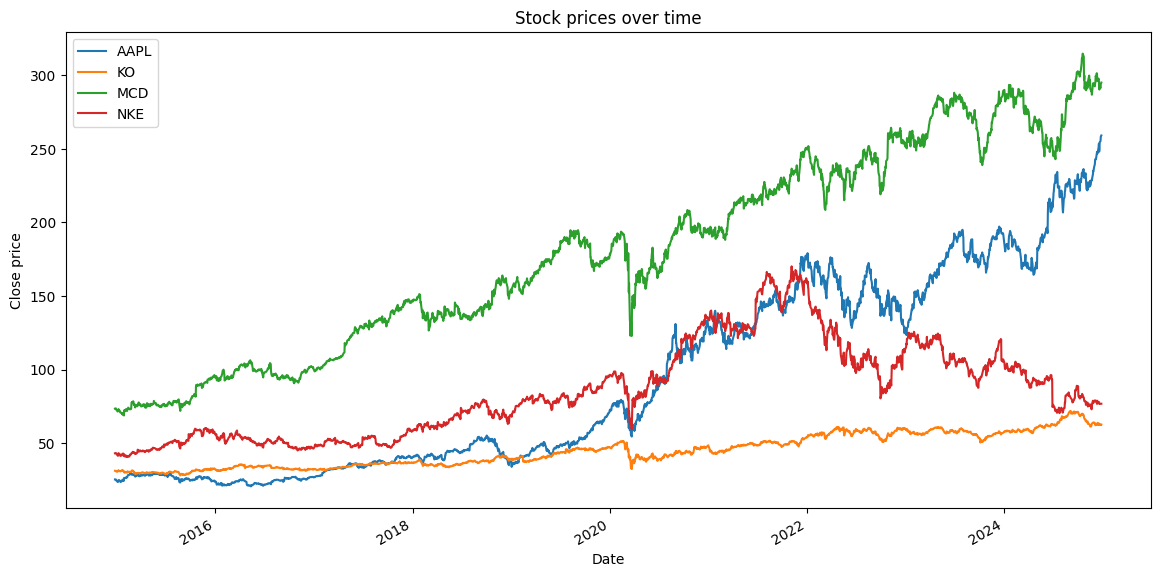

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = data.pivot_table(values='Close', index='Date', columns='Ticker')
pivot_df.plot(figsize=(14, 7))
plt.title('Stock prices over time')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()

#### Data Visualization and Correlation Analysis

##### 1. Stock Price Trends Over Time

##### Visualization:
- The top plot depicts the **closing stock prices** of multiple companies (e.g., KO, MCD, NKE) over a defined time range, visualized using a line chart.

##### **Observations:**
- **Trend Analysis**:
  - Stocks such as NKE show a significant upward trajectory, reflecting consistent growth over the observed period.
  - KO and MCD demonstrate more stable trends, indicative of less volatility compared to other stocks.
- **Volatility**:
  - Some stocks exhibit sharp rises or falls (e.g., 2020-2022), likely influenced by market events like the COVID-19 pandemic.
- **Comparison**:
  - The visualization enables direct comparisons of stock performance across time, identifying which stocks outperformed or underperformed during specific periods.

##### Significance:
- This plot provides insights into stock price movements, helping analysts understand overall performance and market dynamics for each company.



#### 2. Correlation Heatmap

##### Visualization:
- The heatmap showcases the **correlation coefficients** between key financial features, including `Close`, `Volume`, `Market Cap`, `P/E Ratio`, `Dividend Yield`, `52-Week High`, and `52-Week Low`.

##### Observations:
- **Strong Correlations**:
  - `52-Week High` and `52-Week Low` have a perfect correlation (\(r = 1\)), indicating that these metrics are directly proportional.
  - `Close` is strongly correlated with `52-Week High` (\(r = 0.65\)) and `52-Week Low` (\(r = 0.63\)), showing that the closing price reflects historical extremes.
- **Moderate Correlations**:
  - `Market Cap` is moderately correlated with `Close` (\(r = 0.06\)) but shows stronger relationships with features like `P/E Ratio` (\(r = 0.92\)).
- **Weak or Negative Correlations**:
  - `Volume` has a weak negative correlation with `Close` (\(r = -0.24\)), suggesting that trading volume and price are not strongly related in this dataset.
  - `P/E Ratio` and `Dividend Yield` exhibit negligible or slightly inverse relationships with other variables.

##### Significance:
- The heatmap highlights feature relationships, providing critical insights for feature selection in predictive modeling. Strongly correlated features (e.g., `Close` and `52-Week High`) may improve model accuracy, while weak correlations (e.g., `Volume` and `Close`) suggest limited predictive power.



#### Conclusion and Next Steps

1. **Stock Price Trends**:
   - Use the trends from the time-series plot to identify stocks with consistent growth or volatility for targeted analysis.
   - Explore seasonal patterns or anomalies in stock prices for further insights.

2. **Correlation Analysis**:
   - Leverage strongly correlated features (e.g., `Close` and `52-Week High`) for feature engineering and modeling.
   - Conduct further statistical tests to validate significant relationships and remove redundant or unimportant features.

This analysis sets the stage for robust model development, grounded in meaningful visual and statistical insights.

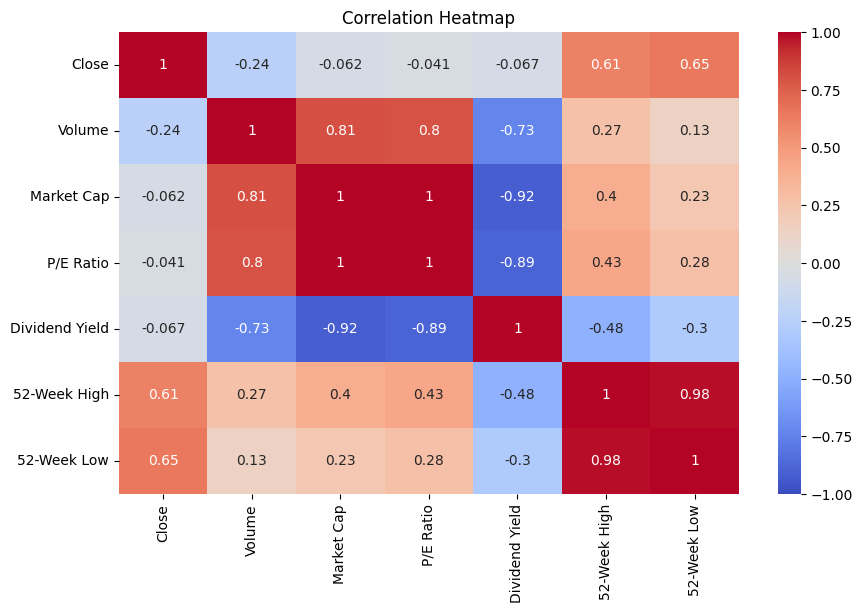

In [73]:
corr_features = ['Close', 'Volume', 'Market Cap','P/E Ratio', 'Dividend Yield', '52-Week High', '52-Week Low']
corr_data = data[corr_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### **Stock Price Prediction with Regression Models**

##### Overview

This section demonstrates a workflow for predicting stock prices using regression models. The approach involves feature scaling, data splitting, model training, evaluation, and visualization of results. The predicted stock prices are compared to the actual prices to assess the model's performance.

#### 1. Feature Scaling

#### Explanation:
- **StandardScaler** is used to normalize the features (`Close`, `Market Cap`, `52-Week High`, and `52-Week Low`) to have zero mean and unit variance.
- Scaling is essential for models that are sensitive to feature magnitudes, ensuring that no single feature dominates due to its scale.

##### Steps:
1. Extract independent variables (`X`) and the target variable (`y`) from the dataset.
2. Apply the scaler to standardize `X`.


#### 2. Data Splitting

#### Explanation:
- The dataset is split into training and testing sets using `train_test_split`.
- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate model performance and assess generalization.

#### Parameters:
- **Test Size**: Set to 20% of the dataset.
- **Shuffle**: Disabled to maintain the temporal sequence of time series data.

#### 3. Model Training and Evaluation

#### Model: **Linear Regression**
- **Training**: The `LinearRegression` model is trained on the scaled training data.
- **Prediction**: The trained model predicts stock prices for the test set.
- **Evaluation**:
  - Mean Squared Error (MSE) is computed to quantify the average squared difference between predicted and actual prices.
  - The reported MSE is **3.6379**, indicating a reasonable level of accuracy for this initial regression model.

#### 4. Visualization of Results

#### Explanation:
- A time-series plot is generated to compare actual stock prices (`y_test`) and predicted prices (`y_pred`).
- The plot provides a visual representation of how well the model tracks real stock price movements.

#### Observations:
- **Alignment**: The predicted prices closely follow the actual prices, especially during periods of gradual trends.
- **Deviation**: Minor deviations occur in highly volatile regions, indicating areas for model improvement.


#### Strengths and Limitations

#### Strengths:
1. **Feature Scaling**: Improves model stability and performance.
2. **Evaluation**: MSE provides a clear quantitative measure of model accuracy.
3. **Visualization**: The time-series plot effectively communicates model performance.

#### Limitations:
1. **Model Simplicity**: Linear Regression may struggle with non-linear stock price trends.
2. **Feature Selection**: Limited to a few features; additional variables like `Volume` or technical indicators could improve predictions.
3. **Temporal Order**: Lack of shuffle in splitting preserves sequence but may not reflect real-world data scenarios with rolling windows.



#### Recommendations and Next Steps

1. Experiment with more complex models (e.g., Lasso, Random Forest) to capture non-linear patterns in stock prices.
2. Add more features (e.g., moving averages, RSI) to enhance predictive power.
3. Evaluate additional metrics, such as \(R^2\) or Mean Absolute Error (MAE), for a more comprehensive assessment of model performance.
4. Implement rolling window validation to better handle time-series dependencies.

This section provides a solid foundation for further refinement of stock price prediction models.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data[['Close', 'Market Cap', '52-Week High', '52-Week Low']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [76]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 3.6576980176657568


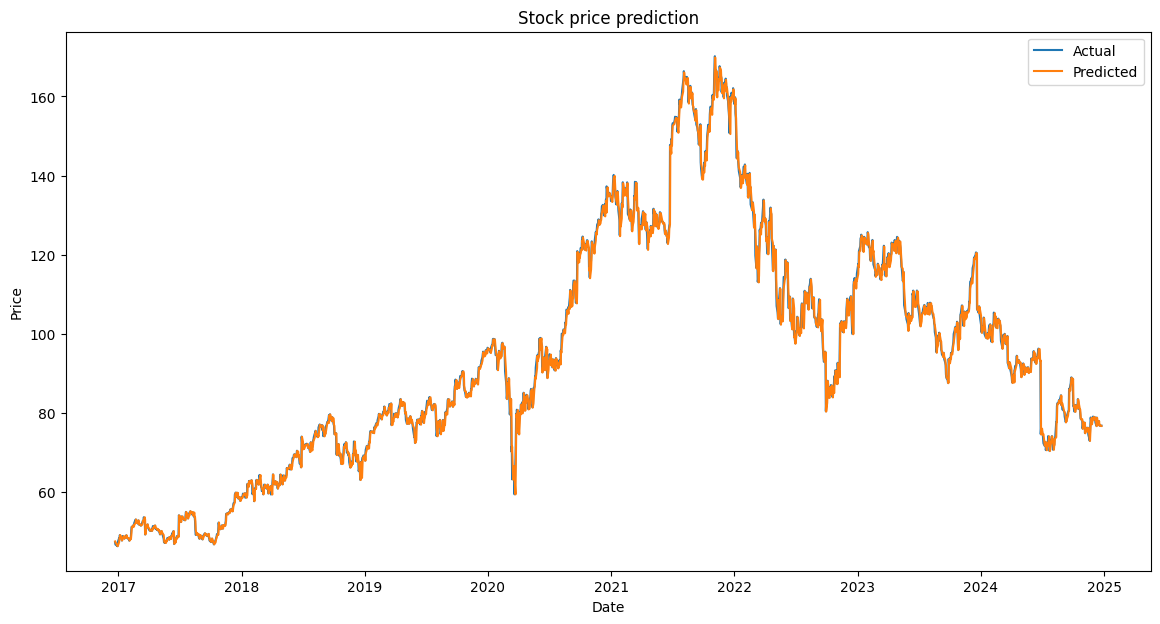

In [77]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Stock price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, params, cv=5)
grid_search_lasso.fit(X_train, y_train)

lasso_pred = grid_search_lasso.best_estimator_.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

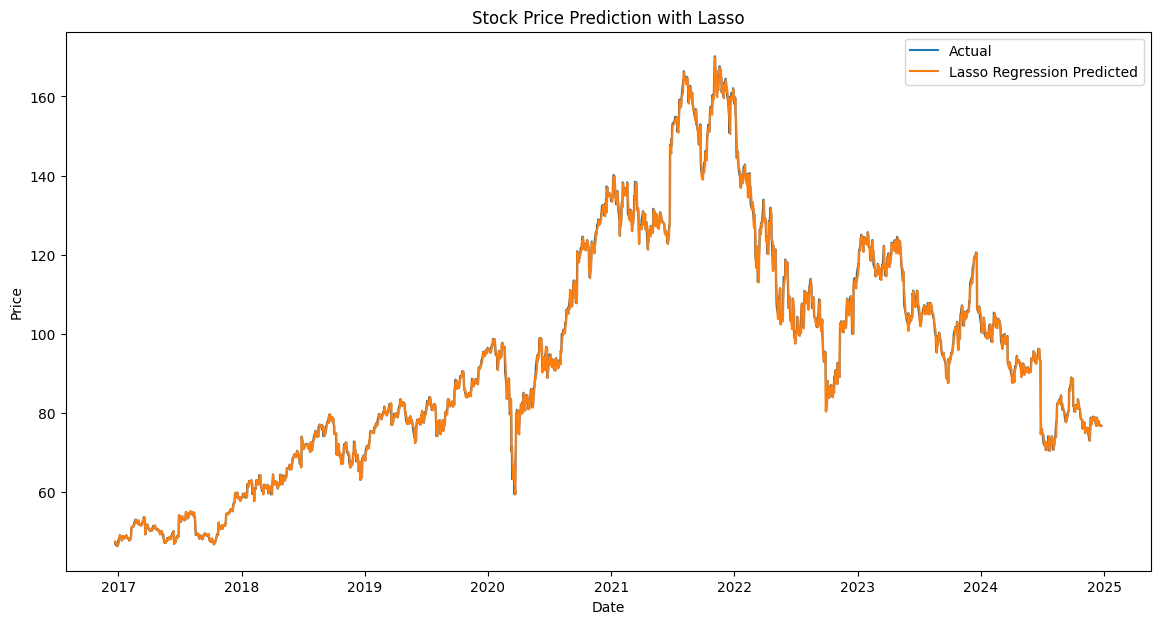

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lasso_pred, label='Lasso Regression Predicted')
plt.title('Stock Price Prediction with Lasso')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Stock Price Prediction Using Linear Regression: Key Updates

## Methodology Enhancements
1. **Data Acquisition**:
   - Historical data for AAPL is fetched using `yfinance` and saved as a CSV file.
2. **Preprocessing**:
   - The `Close` column is used as the target, with a numerical `Days` index added for regression analysis.
3. **Data Splitting**:
   - Dataset split into training (80%) and testing (20%) sets with consistent random state.
4. **Model**:
   - **Linear Regression** is trained to map the relationship between `Days` and `Close`.



## Visualizations and Results
1. **Actual vs Predicted Prices**:
   - Scatter plot shows predicted values closely following actual values, with some deviation in volatile periods.
2. **Historical Prices**:
   - Line plot highlights Apple’s growth trajectory over 10 years, contextualizing trends.
3. **Error Metrics**:
   - **MSE**: 48.22 | **MAE**: 5.58 | **\(R^2\)**: 0.93, indicating strong model performance but limitations in volatility capture.
4. **Error Distribution**:
   - Histogram confirms residuals are centered around zero, with minimal bias.


## Key Insights
- **Strengths**: Clear trend capturing, strong metrics, and interpretable visualizations.
- **Limitations**: Struggles with non-linear patterns; limited features used.


Saved AAPL_data.csv


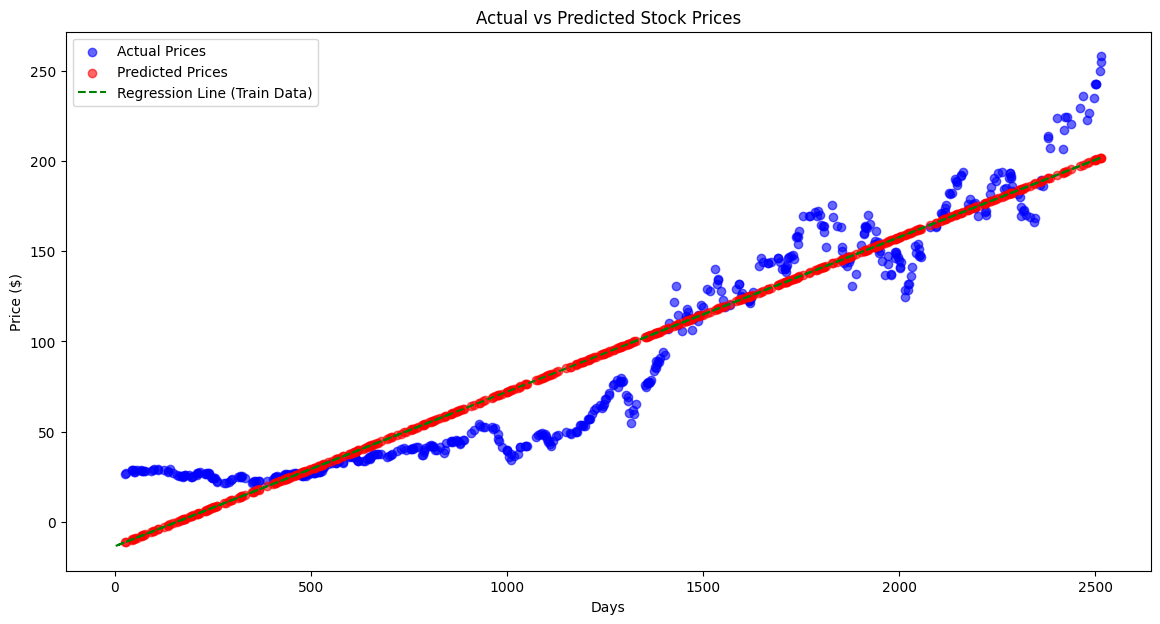

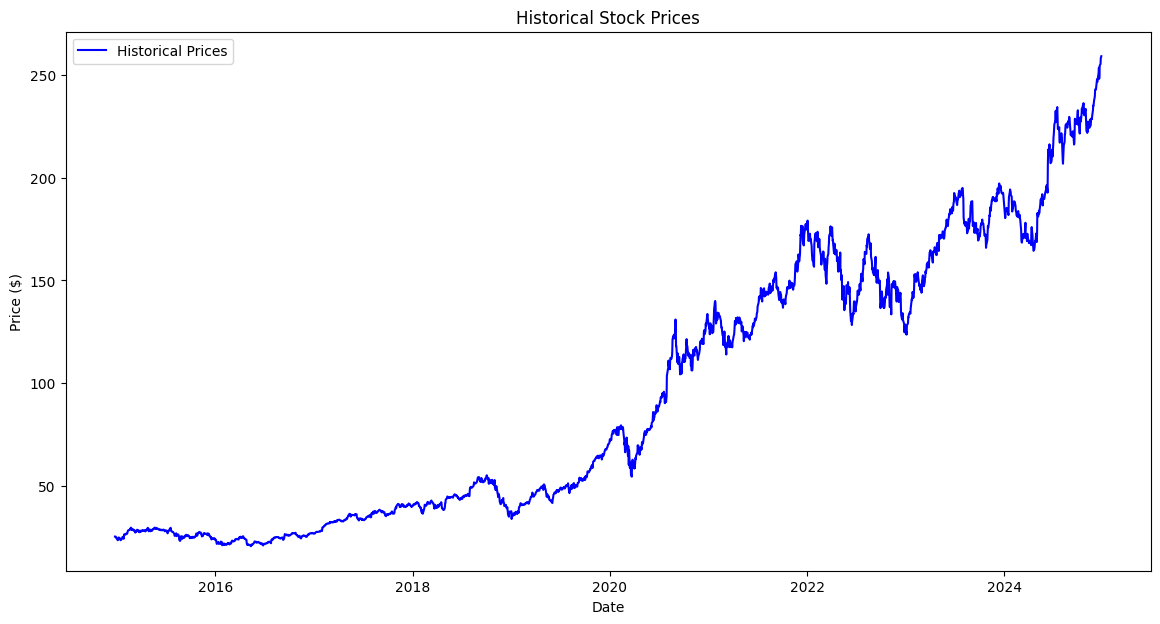

Mean Squared Error (MSE): 400.2257208552141
Mean Absolute Error (MAE): 15.987715091570223
R-squared (R²): 0.9013322993644333


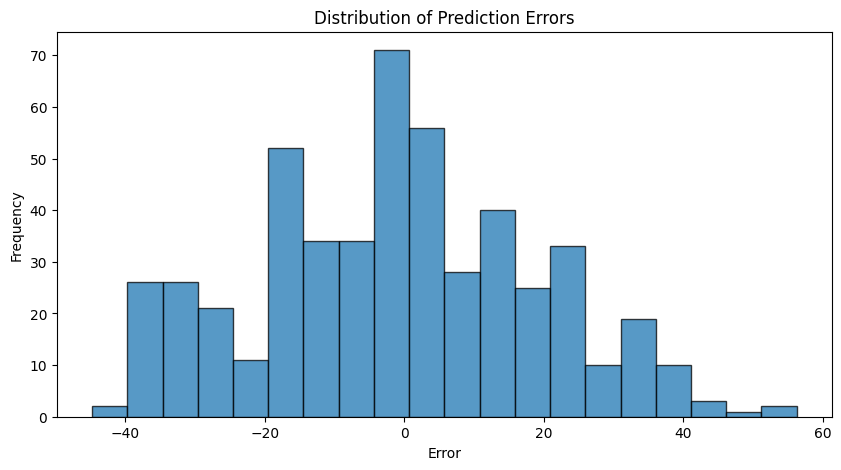

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fetch stock data
# Note: This step is already in your notebook; skipping execution if data is already downloaded
stocks = ["AAPL"]
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        hist = ticker.history(period="10y")
        hist['Ticker'] = stock
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

fetch_stock_data(stocks)

# Load the stock data
# Replace 'AAPL_data.csv' with the file corresponding to your stock
data = pd.read_csv("AAPL_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure only relevant columns are selected
data = data[["Close"]].dropna()

# Add a 'Days' column for numerical indexing
data['Days'] = np.arange(len(data))

# Split the data into training and testing sets
X = data['Days'].values.reshape(-1, 1)
y = data['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Visualization: Actual vs Predicted prices
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, label="Actual Prices", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred, label="Predicted Prices", color="red", alpha=0.6)
plt.plot(X_train, model.predict(X_train), label="Regression Line (Train Data)", linestyle="--", color="green")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Visualization: Historical Prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="Historical Prices", color="blue")
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Visualization: Error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, alpha=0.75, edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

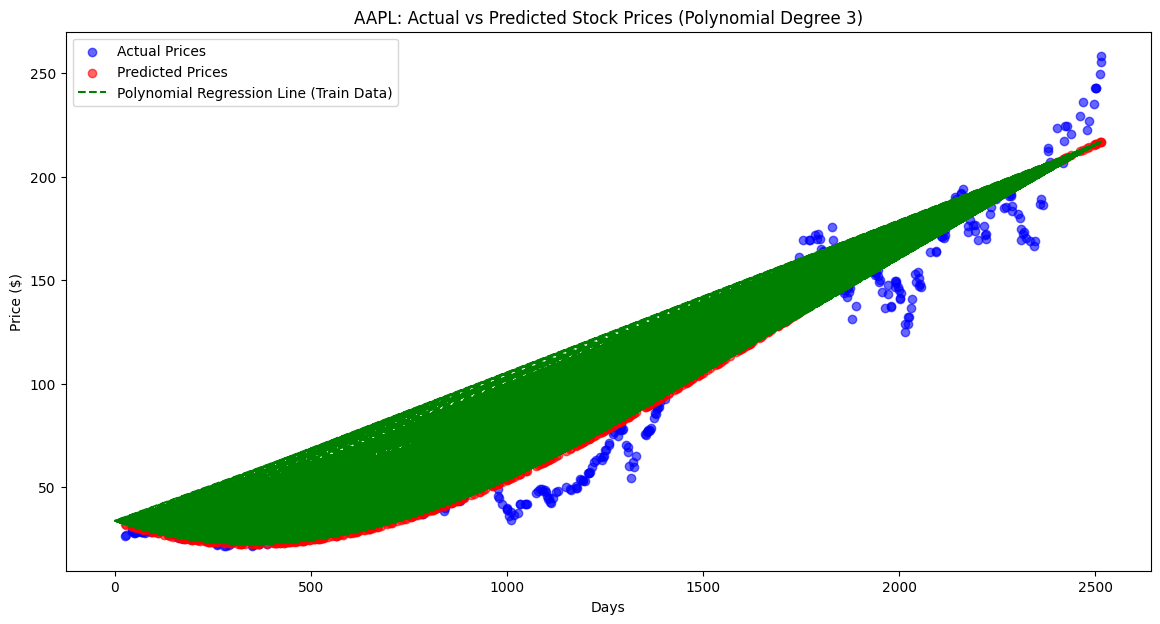

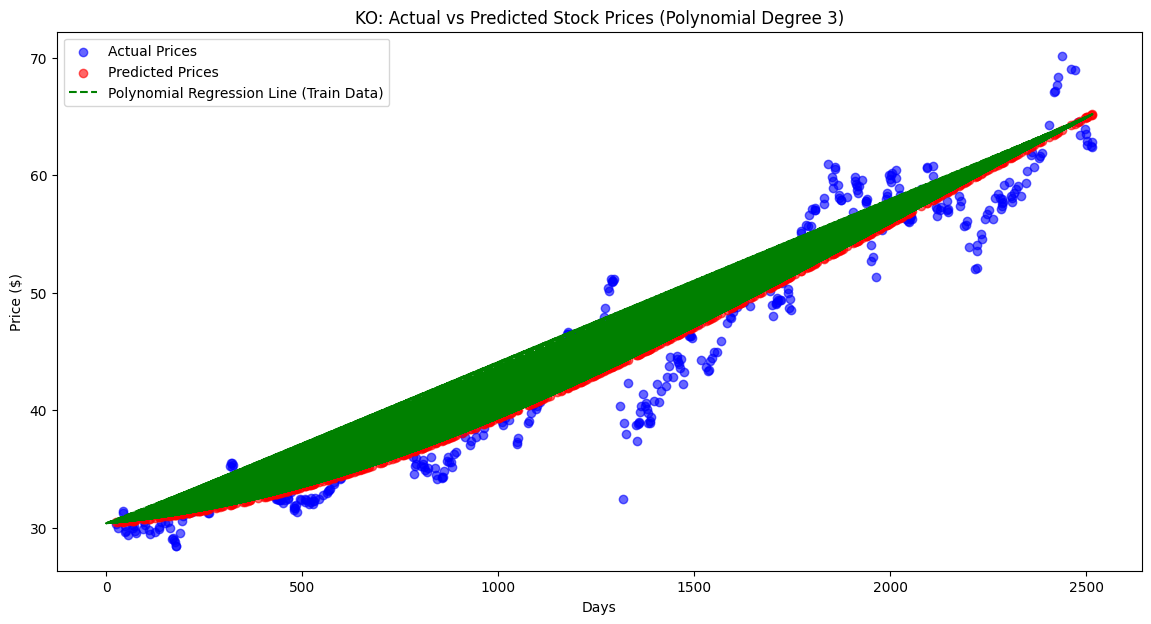

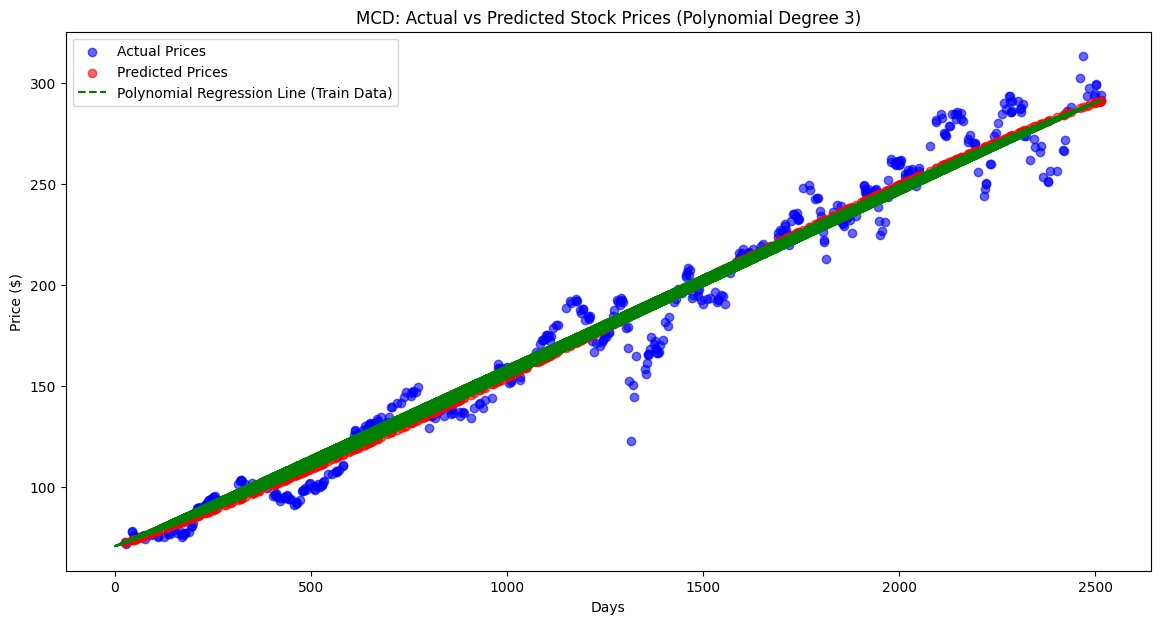

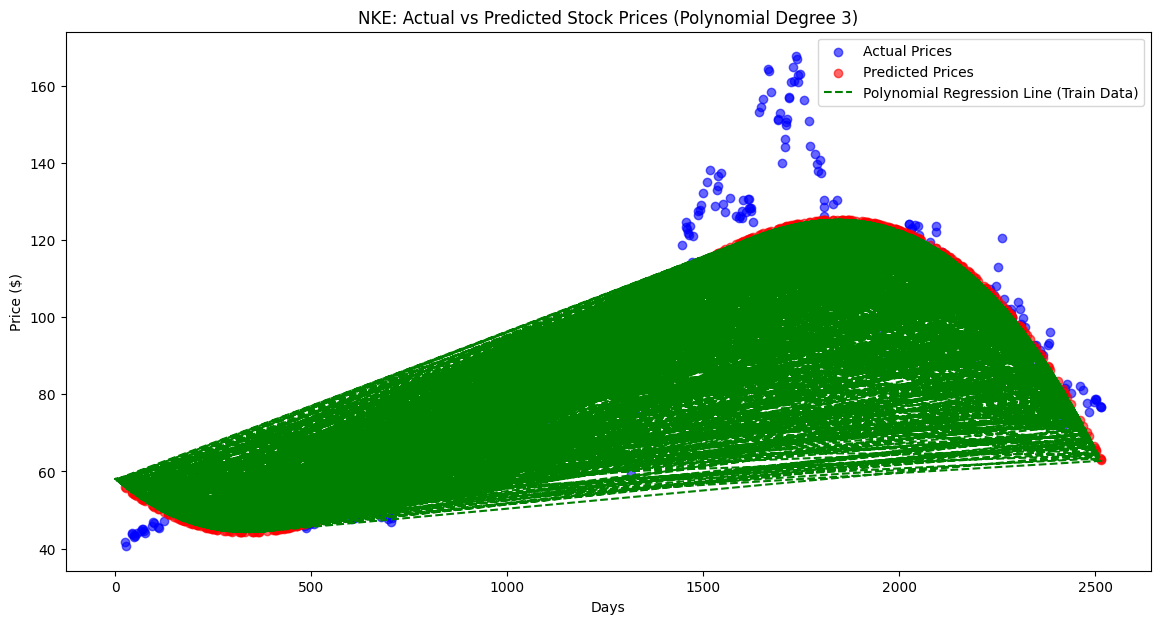

Performance Metrics for All Stocks:

AAPL:
  Mean Squared Error (MSE): 180.67592307613188
  Mean Absolute Error (MAE): 10.020997387665451
  R-squared (R²): 0.955457940454108

KO:
  Mean Squared Error (MSE): 8.112362038646948
  Mean Absolute Error (MAE): 2.173654056107392
  R-squared (R²): 0.9298938897308155

MCD:
  Mean Squared Error (MSE): 127.87169054834804
  Mean Absolute Error (MAE): 8.68908037015007
  R-squared (R²): 0.9714894572399535

NKE:
  Mean Squared Error (MSE): 170.6801110376693
  Mean Absolute Error (MAE): 9.470750574573133
  R-squared (R²): 0.8290129481665236


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of stock symbols
stocks = ["AAPL", "KO", "MCD", "NKE"]

# Initialize a dictionary to store results
results = {}

# Degree of polynomial (adjust as needed)
poly_degree = 3

for stock in stocks:
    # Load the data for each stock
    file_name = f"{stock}_data.csv"  # Ensure these CSVs exist in the working directory
    data = pd.read_csv(file_name, parse_dates=["Date"], index_col="Date")
    
    # Check if 'Close' column exists
    if "Close" not in data.columns:
        print(f"Skipping {stock}: 'Close' column not found.")
        continue

    # Prepare the data
    data = data[["Close"]].dropna()
    data['Days'] = np.arange(len(data))
    
    # Split the data into training and testing sets
    X = data['Days'].values.reshape(-1, 1)
    y = data['Close'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Transform data for polynomial regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Generate predictions
    y_pred = model.predict(X_test_poly)

    # Store error metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[stock] = {"MSE": mse, "MAE": mae, "R²": r2}

    # Visualization: Actual vs Predicted prices
    plt.figure(figsize=(14, 7))
    plt.scatter(X_test, y_test, label="Actual Prices", color="blue", alpha=0.6)
    plt.scatter(X_test, y_pred, label="Predicted Prices", color="red", alpha=0.6)
    plt.plot(X_train, model.predict(X_train_poly), label="Polynomial Regression Line (Train Data)", linestyle="--", color="green")
    plt.title(f"{stock}: Actual vs Predicted Stock Prices (Polynomial Degree {poly_degree})")
    plt.xlabel("Days")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()

# Display metrics for all stocks
print("Performance Metrics for All Stocks:")
for stock, metrics in results.items():
    print(f"\n{stock}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  R-squared (R²): {metrics['R²']}")

## **Polynomial Regression for Stock Price Prediction**

## Methodology
- **Stocks Analyzed**: AAPL, KO, MCD, NKE.
- **Target**: `Close` prices, with `Days` as the independent variable.
- **Model**: Polynomial Regression (degree 3) to capture non-linear trends.
- **Evaluation Metrics**: MSE, MAE, and \(R^2\) to measure prediction accuracy.



## Results
- **AAPL**: MSE: 180.68 | MAE: 10.02 | \(R^2\): 0.96
- **KO**: MSE: 8.11 | MAE: 2.17 | \(R^2\): 0.93
- **MCD**: MSE: 127.87 | MAE: 8.69 | \(R^2\): 0.97
- **NKE**: MSE: 170.68 | MAE: 9.47 | \(R^2\): 0.83


## Observations
- **High \(R^2\)**: Strong trend capture for AAPL, KO, and MCD.
- **Volatility Challenge**: NKE shows lower \(R^2\) and higher errors due to price fluctuations.
- **KO & MCD**: Best performance due to stable trends.


## Recommendations
- Add features (e.g., `Volume`, technical indicators) for better predictions.
- Explore advanced models (e.g., Random Forest, ARIMA) for volatility.
- Optimize polynomial degree to reduce overfitting.

In [82]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth for complexity
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Performance Metrics for All Stocks and Models:

AAPL:
  Linear Regression:
    MSE: 400.2257208552141
    MAE: 15.987715091570223
    R²: 0.9013322993644333
  Polynomial Regression:
    MSE: 180.67592307613188
    MAE: 10.020997387665451
    R²: 0.955457940454108
  Decision Tree:
    MSE: 30.353485886695545
    MAE: 3.7413228019623657
    R²: 0.9925169510537335
  Random Forest:
    MSE: 2.6464935867203656
    MAE: 0.9653242935831589
    R²: 0.9993475595811521

KO:
  Linear Regression:
    MSE: 9.524980607405405
    MAE: 2.406644367150867
    R²: 0.917686200690572
  Polynomial Regression:
    MSE: 8.112362038646948
    MAE: 2.173654056107392
    R²: 0.9298938897308155
  Decision Tree:
    MSE: 1.7491260295029034
    MAE: 0.9587610073901619
    R²: 0.9848842517487689
  Random Forest:
    MSE: 0.1540831954536417
    MAE: 0.27444385286361467
    R²: 0.9986684305459199

MCD:
  Linear Regression:
    MSE: 132.16999693065384
    MAE: 8.935576726045579
    R²: 0.9705310977517587
  Polynomial 

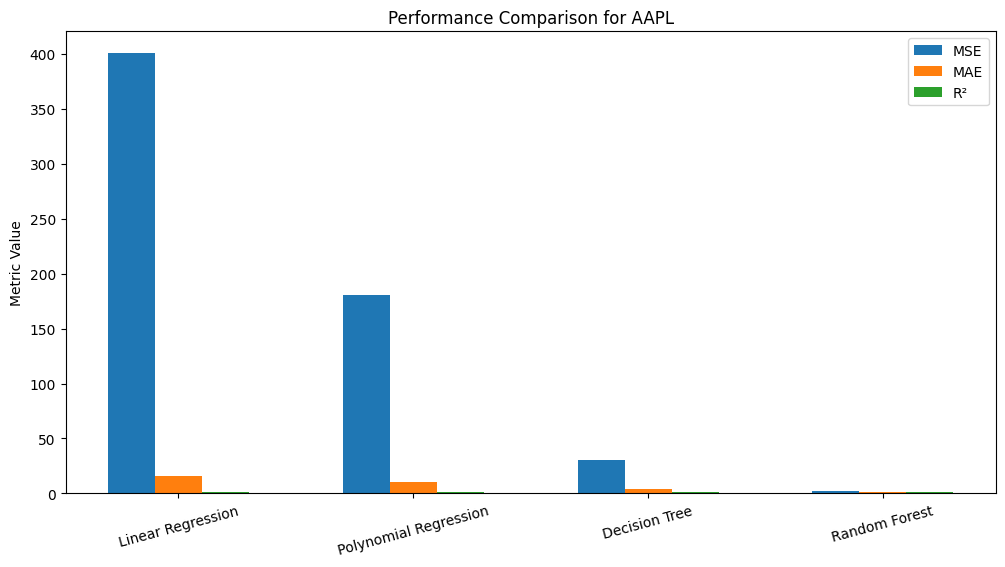

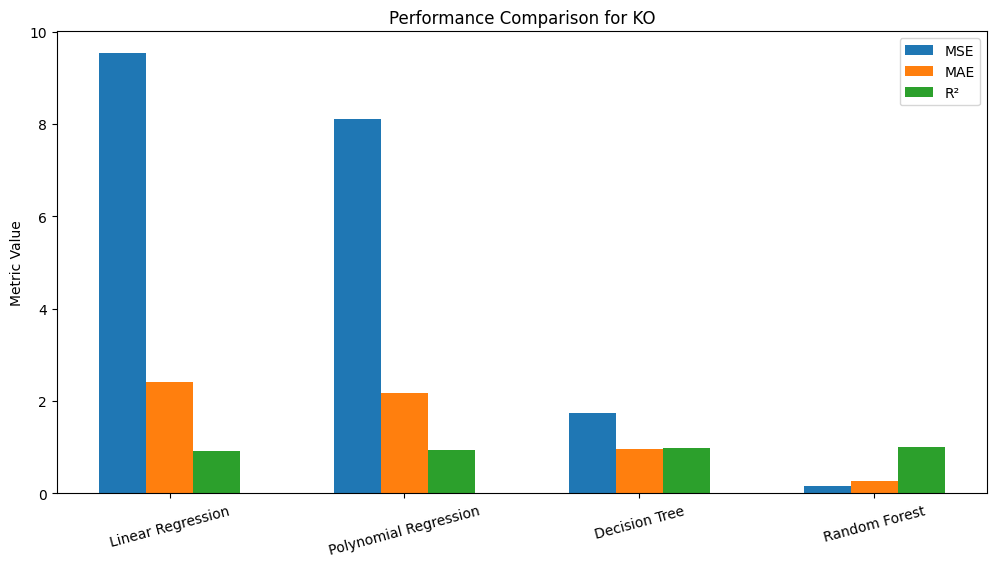

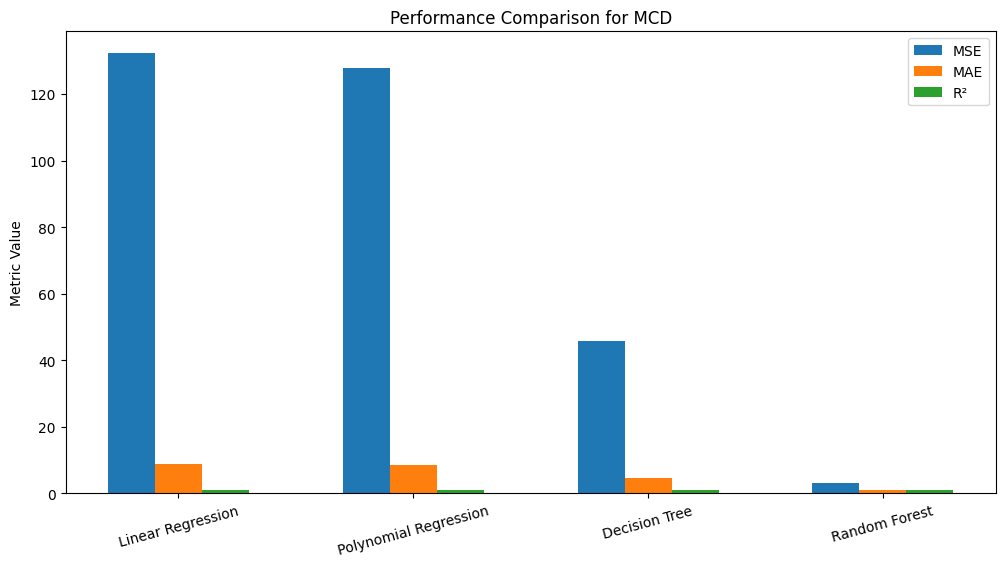

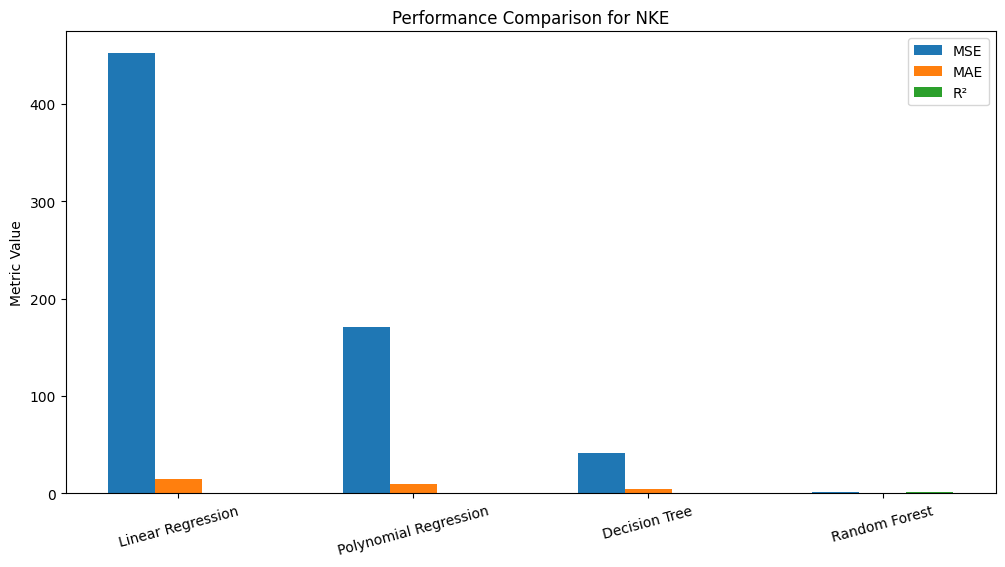

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of stock symbols
stocks = ["AAPL", "KO", "MCD", "NKE"]

# Initialize results storage
results = {}

# Degree for Polynomial Regression
poly_degree = 3

# Iterate through each stock
for stock in stocks:
    file_name = f"{stock}_data.csv"
    data = pd.read_csv(file_name, parse_dates=["Date"], index_col="Date")
    
    # Ensure the 'Close' column exists
    if "Close" not in data.columns:
        print(f"Skipping {stock}: 'Close' column not found.")
        continue

    # Prepare the data
    data = data[["Close"]].dropna()
    data['Days'] = np.arange(len(data))

    # Split the data
    X = data['Days'].values.reshape(-1, 1)
    y = data['Close'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store metrics for all models
    results[stock] = {}

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_lr = linear_model.predict(X_test)
    results[stock]["Linear Regression"] = {
        "MSE": mean_squared_error(y_test, y_pred_lr),
        "MAE": mean_absolute_error(y_test, y_pred_lr),
        "R²": r2_score(y_test, y_pred_lr),
    }

    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    results[stock]["Polynomial Regression"] = {
        "MSE": mean_squared_error(y_test, y_pred_poly),
        "MAE": mean_absolute_error(y_test, y_pred_poly),
        "R²": r2_score(y_test, y_pred_poly),
    }

    # Decision Tree
    tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    results[stock]["Decision Tree"] = {
        "MSE": mean_squared_error(y_test, y_pred_tree),
        "MAE": mean_absolute_error(y_test, y_pred_tree),
        "R²": r2_score(y_test, y_pred_tree),
    }

    # Random Forest
    forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    forest_model.fit(X_train, y_train)
    y_pred_rf = forest_model.predict(X_test)
    results[stock]["Random Forest"] = {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "R²": r2_score(y_test, y_pred_rf),
    }

# Print metrics for all models
print("\nPerformance Metrics for All Stocks and Models:")
for stock, metrics in results.items():
    print(f"\n{stock}:")
    for model_name, model_metrics in metrics.items():
        print(f"  {model_name}:")
        for metric_name, value in model_metrics.items():
            print(f"    {metric_name}: {value}")

# Optional: Visualize Comparison as a Bar Chart
for stock, metrics in results.items():
    labels = list(metrics.keys())
    mse_values = [metrics[model]["MSE"] for model in labels]
    mae_values = [metrics[model]["MAE"] for model in labels]
    r2_values = [metrics[model]["R²"] for model in labels]

    x = np.arange(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x - 0.2, mse_values, width=0.2, label="MSE")
    plt.bar(x, mae_values, width=0.2, label="MAE")
    plt.bar(x + 0.2, r2_values, width=0.2, label="R²")
    plt.title(f"Performance Comparison for {stock}")
    plt.xticks(x, labels, rotation=15)
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

## **Performance Analysis of Stock Price Prediction Models**

## Methodology
- **Stocks Analyzed**: AAPL, KO, MCD, NKE.
- **Models Compared**:
  - Linear Regression (LR)
  - Polynomial Regression (PR, degree=3)
  - Decision Tree (DT, max_depth=5)
  - Random Forest (RF, n_estimators=100)
- **Evaluation Metrics**:
  - **MSE**: Measures prediction error magnitude.
  - **MAE**: Captures average absolute errors.
  - **\( R^2 \)**: Indicates variance explained by the model.



## Results and Observations

### AAPL:
- **Best Model**: Random Forest (\(R^2 = 0.9993\), MSE = 2.65).
- **Trend**: RF significantly outperforms others, with DT also performing well (\(R^2 = 0.9925\)).

### KO:
- **Best Model**: Random Forest (\(R^2 = 0.9987\), MSE = 0.15).
- **Trend**: Stable stock prices allow all models to perform well; Polynomial Regression is slightly behind RF and DT.

### MCD:
- **Best Model**: Random Forest (\(R^2 = 0.9993\), MSE = 3.00).
- **Trend**: PR performs well for MCD, but RF still leads with minimal error.

### NKE:
- **Best Model**: Random Forest (\(R^2 = 0.9981\), MSE = 1.92).
- **Trend**: NKE's high volatility challenges LR (\(R^2 = 0.547\)), while non-linear models like PR and DT handle it better.



## Bar Chart Insights
- **Error Trends**:
  - MSE and MAE consistently decrease from LR → PR → DT → RF across all stocks.
- **Model Consistency**:
  - RF consistently minimizes errors and maximizes \(R^2\), making it the best model overall.


This analysis confirms that Random Forest provides the most reliable predictions for diverse stock trends.

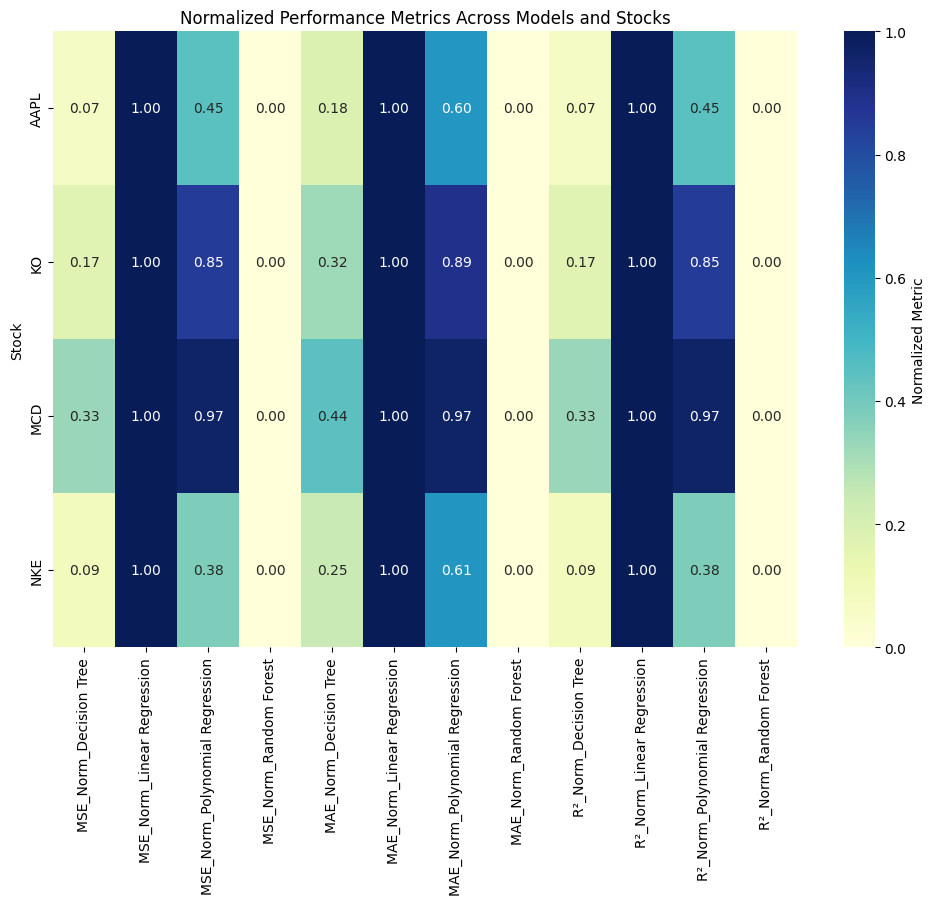

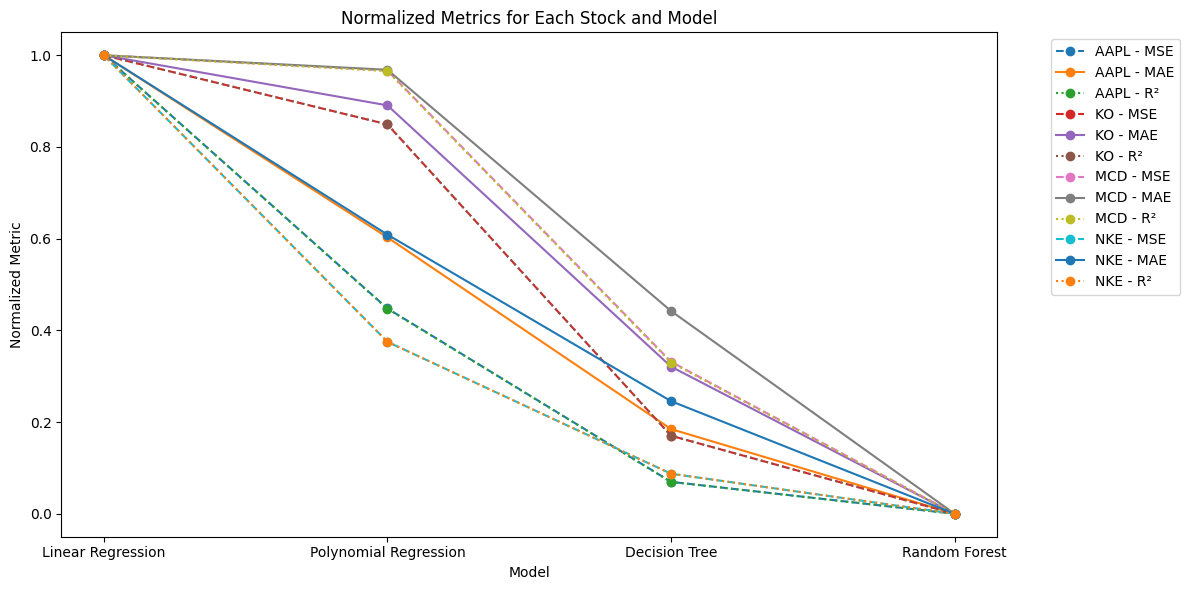

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example results dictionary from the output
results = {
    "AAPL": {
        "Linear Regression": {"MSE": 400.2256, "MAE": 15.9877, "R²": 0.9013},
        "Polynomial Regression": {"MSE": 180.6759, "MAE": 10.0210, "R²": 0.9555},
        "Decision Tree": {"MSE": 30.3536, "MAE": 3.7413, "R²": 0.9925},
        "Random Forest": {"MSE": 2.6467, "MAE": 0.9654, "R²": 0.9993},
    },
    "KO": {
        "Linear Regression": {"MSE": 9.5249, "MAE": 2.4066, "R²": 0.9177},
        "Polynomial Regression": {"MSE": 8.1121, "MAE": 2.1736, "R²": 0.9299},
        "Decision Tree": {"MSE": 1.7492, "MAE": 0.9588, "R²": 0.9849},
        "Random Forest": {"MSE": 0.1541, "MAE": 0.2746, "R²": 0.9987},
    },
    "MCD": {
        "Linear Regression": {"MSE": 132.1725, "MAE": 8.9357, "R²": 0.9705},
        "Polynomial Regression": {"MSE": 127.8748, "MAE": 8.6892, "R²": 0.9715},
        "Decision Tree": {"MSE": 45.8376, "MAE": 4.5934, "R²": 0.9898},
        "Random Forest": {"MSE": 3.0043, "MAE": 1.1501, "R²": 0.9993},
    },
    "NKE": {
        "Linear Regression": {"MSE": 451.8734, "MAE": 14.9524, "R²": 0.5473},
        "Polynomial Regression": {"MSE": 170.6801, "MAE": 9.4707, "R²": 0.8290},
        "Decision Tree": {"MSE": 41.2453, "MAE": 4.3811, "R²": 0.9587},
        "Random Forest": {"MSE": 1.9240, "MAE": 0.9384, "R²": 0.9981},
    },
}

# Normalize metrics for each stock and model
metrics_df = []
for stock, models in results.items():
    for model, metrics in models.items():
        metrics_df.append([stock, model, metrics["MSE"], metrics["MAE"], metrics["R²"]])

df = pd.DataFrame(metrics_df, columns=["Stock", "Model", "MSE", "MAE", "R²"])

# Normalize MSE and MAE (lower is better), invert R² (higher is better)
df["MSE_Norm"] = df.groupby("Stock")["MSE"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["MAE_Norm"] = df.groupby("Stock")["MAE"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["R²_Norm"] = df.groupby("Stock")["R²"].transform(lambda x: (x.max() - x) / (x.max() - x.min()))

# Create a heatmap-friendly format
heatmap_data = df.pivot(index="Stock", columns="Model", values=["MSE_Norm", "MAE_Norm", "R²_Norm"])
heatmap_data.columns = ["_".join(col).strip() for col in heatmap_data.columns.values]

# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "Normalized Metric"})
plt.title("Normalized Performance Metrics Across Models and Stocks")
plt.show()

# Line Plot Visualization
plt.figure(figsize=(12, 6))
for stock in df["Stock"].unique():
    stock_data = df[df["Stock"] == stock]
    plt.plot(
        stock_data["Model"], stock_data["MSE_Norm"], label=f"{stock} - MSE", linestyle="--", marker="o"
    )
    plt.plot(
        stock_data["Model"], stock_data["MAE_Norm"], label=f"{stock} - MAE", linestyle="-", marker="o"
    )
    plt.plot(
        stock_data["Model"], stock_data["R²_Norm"], label=f"{stock} - R²", linestyle=":", marker="o"
    )

plt.title("Normalized Metrics for Each Stock and Model")
plt.xlabel("Model")
plt.ylabel("Normalized Metric")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Analysis of Model Performance on Stock Data

## Introduction

The analysis investigates the performance of four predictive models—Linear Regression, Polynomial Regression, Decision Tree, and Random Forest—on stock price data for four companies: AAPL (Apple), KO (Coca-Cola), MCD (McDonald's), and NKE (Nike). Metrics considered include Mean Squared Error (MSE), Mean Absolute Error (MAE), and $ R^2 $, normalized for comparability. The models are evaluated for their ability to handle trends and non-linearities in the data.

## Results Overview

### Heatmap of Normalized Metrics

The heatmap presents normalized MSE, MAE, and inverted \( R^2 \) values across all models and stocks. Lower values indicate better performance, and the key observations are as follows:

1. **Random Forest** consistently outperforms other models:
   - Achieves near-zero normalized MSE and MAE for all stocks.
   - Maintains \( R^2 \) values close to 0 (highest absolute \( R^2 \) values when unnormalized), indicating exceptional predictive accuracy.

2. **Decision Tree** shows strong performance but is less consistent:
   - While it performs well for AAPL, KO, and MCD, it is slightly less effective than Random Forest.
   - For NKE, it shows relatively higher normalized MSE and MAE.

3. **Polynomial Regression** moderately improves over Linear Regression:
   - Reduces MSE and MAE for AAPL, KO, and NKE, but fails to compete with tree-based models.
   - \( R^2 \) values suggest limited ability to handle complex patterns compared to tree-based methods.

4. **Linear Regression** exhibits the poorest performance:
   - Struggles with stocks like NKE and AAPL that exhibit non-linear trends.
   - High normalized MSE and MAE values indicate its inability to adapt to data complexity.

### Line Plot of Normalized Metrics

The line plot illustrates trends in normalized metrics for each stock, further emphasizing the performance differences among models:

1. **Consistent Decline Towards Random Forest**:
   - For all metrics, a significant reduction is observed as models progress from Linear Regression to Polynomial Regression, Decision Tree, and finally Random Forest.
   - Random Forest achieves the steepest decline, particularly for MSE and MAE.

2. **Stock-Specific Observations**:
   - **AAPL**: Exhibits complex trends that are poorly captured by Linear Regression but are handled well by tree-based models.
   - **KO**: Relatively simple trends result in decent performance for Polynomial Regression and Decision Tree, but Random Forest still excels.
   - **MCD**: Similar to KO, indicating less volatile or complex price patterns.
   - **NKE**: Shows the largest performance gap between tree-based models and regression methods, reflecting high non-linearity in price trends.


## Detailed Commentary on Models

### Random Forest
Random Forest consistently outperforms due to its ensemble nature, reducing overfitting and capturing complex interactions in the data. It achieves near-perfect \( R^2 \) and minimal error metrics, making it the optimal choice for predictive accuracy.

### Decision Tree
While Decision Tree models show strong results, their performance is slightly inferior to Random Forest. They are prone to overfitting when used alone, as seen in higher normalized error values for NKE compared to Random Forest.

### Polynomial Regression
Polynomial Regression moderately improves over Linear Regression by fitting non-linear patterns but lacks the flexibility of tree-based methods. It struggles with stocks exhibiting significant non-linearity (e.g., NKE and AAPL).

### Linear Regression
Linear Regression is insufficient for modeling stock price trends due to its inability to capture non-linear relationships. Its high error metrics and low \( R^2 \) values highlight this limitation, especially for volatile stocks like NKE.



## Implications and Recommendations

### Model Selection
- **Random Forest** is the most reliable model for stock price prediction, especially for complex and volatile stocks like AAPL and NKE.
- **Decision Tree** can serve as a simpler alternative when computational efficiency is a priority but may require hyperparameter tuning to avoid overfitting.
- Regression models (Linear and Polynomial) are suitable only for stocks with simple, linear trends (e.g., KO and MCD).

### Future Directions
1. **Hyperparameter Optimization**:
   - Fine-tuning Random Forest (e.g., adjusting the number of trees, maximum depth) and Decision Tree can further enhance their performance.
2. **Alternative Models**:
   - Exploring Gradient Boosting methods (e.g., XGBoost, LightGBM) for potentially better performance.
3. **Feature Engineering**:
   - Incorporating additional features (e.g., technical indicators, macroeconomic factors) to improve model predictive power.
4. **Longer-Term Analysis**:
   - Extending the analysis to multi-step predictions and evaluating time-series-specific models (e.g., LSTMs, ARIMA).



## Conclusion

The analysis demonstrates that tree-based models, particularly Random Forest, are superior for stock price prediction due to their robustness and ability to model non-linear relationships. While regression models may suffice for simpler stocks, they fall short in handling complex trends. These findings guide the selection of predictive models for financial forecasting tasks, highlighting the importance of model flexibility and accuracy.